In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 19 21:52:46 2018

@author: sreen
"""

import tensorflow as tf
import numpy as np
import gym
from gym import spaces
from gym.utils import seeding
import gym_envs
import random
#from random import choices
import numpy as np
import matplotlib.pyplot as plt

#Declare M and N
env = gym.make('acrobot-v0')
N = env.action_space.n
#print(M)
M, = env.observation_space.shape
print(M)


nn1_units= 16
nn2_units= 16
nn3_units = 16

tf.reset_default_graph()

        
input_observation = tf.placeholder(shape= (M,1) , dtype= tf.float32)
Qnext = tf.placeholder(shape= (N,1) , dtype= tf.float32)
'''
        self.target_Q  = tf.placeholder(shape = (self.N,1), dtype = tf.float64)
        self.current_Q = tf.Variable(tf.random_normal([self.N,1]))
        self.predict =  tf.Variable(tf.random_normal([1,]))

#Defining tensorflow architecture
'''
hidden_1_layer = {'weights':tf.Variable(tf.random_normal([M,nn1_units])),
              'biases':tf.Variable(tf.random_normal([nn1_units,1]))}

hidden_2_layer = {'weights':tf.Variable(tf.random_normal([nn1_units, nn2_units])),
                  'biases':tf.Variable(tf.random_normal([nn2_units,1]))}

hidden_3_layer = {'weights':tf.Variable(tf.random_normal([nn2_units, nn3_units])),
                  'biases':tf.Variable(tf.random_normal([nn3_units,1]))}


output_layer = {'weights':tf.Variable(tf.random_normal([nn3_units, N])),
                'biases':tf.Variable(tf.random_normal([N,1]))}


l1 = tf.add(tf.matmul(tf.transpose(hidden_1_layer['weights']), input_observation), hidden_1_layer['biases'])
l1 = tf.nn.relu(l1)

l2 = tf.add(tf.matmul(tf.transpose(hidden_2_layer['weights']),l1), hidden_2_layer['biases'])
l2 = tf.nn.relu(l2)

l3 = tf.add(tf.matmul(tf.transpose(hidden_3_layer['weights']),l2), hidden_3_layer['biases'])
l3 = tf.nn.relu(l3)

current_Q = tf.matmul(tf.transpose(output_layer['weights']), l3) + output_layer['biases']
predict = tf.argmax(current_Q,0)


'''
current_Q = tf.matmul(tf.transpose(output_layer['weights']), input_observation) + output_layer['biases']
predict = tf.argmax(current_Q,0)
'''
    
    
#BackProp    
loss = tf.reduce_sum(tf.square(Qnext-current_Q))
trainer = tf.train.AdamOptimizer()
updateModel = trainer.minimize(loss)

#init = tf.initialize_all_variables()
init =  tf.global_variables_initializer()


# Set learning parameters
gamma = .9
epsilon = 0.05
num_episodes = 500
#create lists to contain total rewards and steps per episode
jList = []
rList = []
elist = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        s = np.asmatrix(s)
        #print((s.T).shape)
        rAll = 0
        episode_epoch = 0
        d = False
        j = 0
        #The Q-Network
        while j < 1000:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            #print(s)
            a,allQ = sess.run([predict, current_Q], feed_dict={input_observation: s.T})
            #env.render()
            #print('The value of action at iteration %d is %d'%(j,a[0]))
            #print('---AllQ---')
            #print(allQ)
            #print(allQ) 
            if np.random.rand(1) < epsilon:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            s1 = np.asmatrix(s1)
            a2,Q1 = sess.run([predict, current_Q],feed_dict={input_observation : s1.T})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[a,0] = r + gamma*maxQ1
            #Train our network using target and predicted Q values
            _,epoch_loss = sess.run([updateModel, loss],feed_dict={input_observation: s.T, Qnext: targetQ})
            #print(epoch_loss)
            rAll += r
            episode_epoch += epoch_loss
            s = s1
            '''
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
            '''
        jList.append(j)
        rList.append(rAll)
        elist.append(episode_epoch)
        
#print ("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
episode_no = [_+1 for _ in range(num_episodes)]
plt.figure()
plt.plot(episode_no,rList,'r-')
plt.title('Evolution of reward with episode')
plt.xlabel('Episode No')
plt.ylabel('Reward')

plt.figure()
plt.plot(episode_no,elist,'b-')
plt.title('Evolution of training loss with episode')
plt.xlabel('Episode No')
plt.ylabel('Episode Loss')

#plt.show()


/Users/AmberS/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
6


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Text(0,0.5,'Episode Loss')

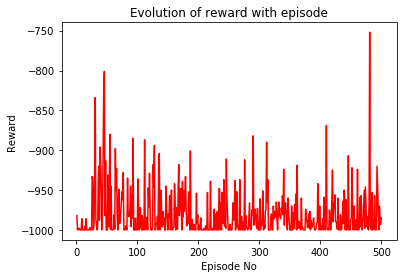

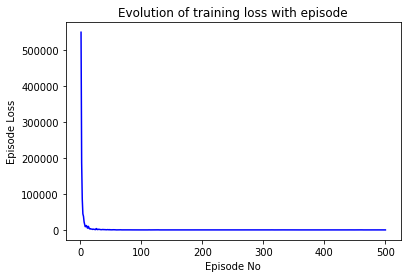

In [3]:
%matplotlib inline

episode_no = [_+1 for _ in range(num_episodes)]
plt.figure()
plt.plot(episode_no,rList,'r-')
plt.title('Evolution of reward with episode')
plt.xlabel('Episode No')
plt.ylabel('Reward')

plt.figure()
plt.plot(episode_no,elist,'b-')
plt.title('Evolution of training loss with episode')
plt.xlabel('Episode No')
plt.ylabel('Episode Loss')